# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Propósito del proyecto:
En este proyeto se realizara la busqueda sobre cuál es paquete que que más ingresos genera, si es el paquete de prepago Surf o Ultimate, asi se podra determina a que plan de prepago de Megaline se le asigna un aumento en el presupuesto de publicidad.


## Inicialización

In [3]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
from math import ceil
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar datos

In [4]:
# Carga los archivos de datos en diferentes DataFrames
df_megaline_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_megaline_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_megaline_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_megaline_plans = pd.read_csv("/datasets/megaline_plans.csv")
df_megaline_users = pd.read_csv("/datasets/megaline_users.csv")

## Preparar los datos

## Tarifas

In [5]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
# Imprime una muestra de los datos para las tarifas
df_megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Lo primero que podemos observar, es que cuenta con solo dos filas, las cuales nos describen cada plan, en la primera fila podemos observar la información del plan de prepago Surf y en la siguiente el plan de prepago Ultimate. 

## Corregir datos

## Enriquecer los datos

Como podemos observar en la tabla, nos encontramos con la columna "mb_per_month_included" que contiene el la cantidad de megabytes que Megaline ofrece como base para sus planes de prepago, pero debido a que en la descripción de los planes estos se encuentran como gigabytes, los datos serán modificados para que estos muestren gigabytes en lugar de megabytes.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
df_megaline_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Por lo que se puede observar en el DataFame la mayoria de los datos ausentes estna en la columna "churn_date" la cual nos muestra la fecha en la que el usuario dejó de usar el servicio. Algo importante a considerad si el valor es ausente existe la posibilidad de que la tarifa se estaba usando cuando fue extraída esta base de datos.

### Corregir los datos

In [9]:
df_megaline_users["churn_date"].fillna("acive", inplace=True)
print(df_megaline_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate      acive  
1  2018-08-13      surf      acive  
2  2018-10-21      surf      acive  
3  2018-01-28      surf      acive  
4  2018-05-23      surf      acive  


In [47]:
df_megaline_users["reg_date"] = pd.to_datetime(df_megaline_users["reg_date"], format="%Y-%m-%d")
print(df_megaline_users["reg_date"].dtype)

datetime64[ns]


Cambie las filas con valores asentes por "active" para tener en cuenta que el plan de prepago de los usuarios esta activo, no elimine los datos debido a que estos representan una parte importante de todos los datos. Además se realizo un cambio en la columna "reg_date" para que esta sea un datatime.

### Enriquecer los datos

In [15]:
df_megaline_users.duplicated().sum()

0

Comprobé la existencia de duplicados, que en este caso son inexistentes. 

## Llamadas

In [20]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
# Imprime una muestra de datos para las llamadas
df_megaline_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
5,1000_388,1000,2018-12-31,3.0
6,1000_510,1000,2018-12-27,6.0
7,1000_521,1000,2018-12-28,15.0
8,1000_530,1000,2018-12-28,6.0
9,1000_544,1000,2018-12-26,5.0


Se puede observar qu el DataFrame cuenta con 137,735 filas que nos muestra el ID de las llamadas realizadas por cada usuarios, la duración de cada una de las llamadas y la fecha en la que se relizo cada llamada. Por lo que se puede observar no se encuentran datos ausentes.

### Corregir los datos

In [18]:
df_megaline_calls["duration"] = np.ceil(df_megaline_calls["duration"])
print(df_megaline_calls["duration"])

0          9.0
1         14.0
2         15.0
3          6.0
4          5.0
          ... 
137730     9.0
137731    11.0
137732     9.0
137733     1.0
137734    14.0
Name: duration, Length: 137735, dtype: float64


Cambie la columna "duration" de para redondear los minutos y segundos a solo minutos, ya que Megaline redondea los segundos a minutos.

### Enriquecer los datos

In [48]:
df_megaline_calls["call_date"] = pd.to_datetime(df_megaline_calls["call_date"], format="%Y-%m-%d")
print(df_megaline_calls["call_date"].dtype)

datetime64[ns]


Realize un cambio en la columna "call_date" para transformar los datos a datetime.

## Mensajes

In [25]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
# Imprime una muestra de datos para los mensajes
df_megaline_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Se puede observar que el DataFrame cuenta con 3 columnas que nos muestran el ID de cada mensaje, así como el ID de cada uno de los usuarios y la fecha en la que se envió el mensaje. Cuenta con 76,051 filas. 

### Corregir los datos

### Enriquecer los datos

In [49]:
df_megaline_messages["message_date"] = pd.to_datetime(df_megaline_messages["message_date"], format="%Y-%m-%d")
print(df_megaline_messages["message_date"].dtype)

datetime64[ns]


Realice un cambio en la columna "message_date" para trasformar los datos a datatime.

## Internet

In [30]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
# Imprime una muestra de datos para el tráfico de internet
df_megaline_internet.head(15)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Como se puede observar el DataFrame no cuenta con valores ausentes, en su contenido podemos encontrar la fecha de la sesión web y cuantos megabytes fueron consumidos por cada ocasión que fue utilizado, además de generar un ID para cada una de las sesiones.

### Corregir los datos

In [34]:
df_megaline_internet["mb_used"] = (df_megaline_internet["mb_used"] / 1024).apply(np.ceil)
df_megaline_internet.rename(columns={"mb_used": "gb_used"}, inplace=True)
print(df_megaline_internet.head())

         id  user_id session_date  gb_used
0   1000_13     1000   2018-12-29      1.0
1  1000_204     1000   2018-12-31      0.0
2  1000_379     1000   2018-12-28      1.0
3  1000_413     1000   2018-12-26      1.0
4  1000_442     1000   2018-12-27      1.0


Se realizó la conversión de megabytes a gigabytes, además de redondear los gigabytes, al igual se hizo un cambio en el nombre de la columna ya que ahora su contenido cambio a gigabytes, esto con la finalidad de evitar confusión en cuanto al contendido de los datos de la columna. 

### Enriquecer los datos

In [50]:
df_megaline_internet["session_date"] = pd.to_datetime(df_megaline_internet["session_date"], format="%Y-%m-%d")
print(df_megaline_internet["session_date"].dtype)

datetime64[ns]


Realice una modificación en la columna "session_date" para que esta fuera de tipo datatime64[ns].

## Estudiar las condiciones de las tarifas

In [36]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [51]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_megaline_calls["year_month"] = df_megaline_calls["call_date"].dt.to_period("M")
calls_per_month = df_megaline_calls.groupby(["user_id", "year_month"]).size().reset_index(name="num_calls")
print(calls_per_month)

      user_id year_month  num_calls
0        1000    2018-12         16
1        1001    2018-08         27
2        1001    2018-09         49
3        1001    2018-10         65
4        1001    2018-11         64
...       ...        ...        ...
2253     1498    2018-12         39
2254     1499    2018-09         41
2255     1499    2018-10         53
2256     1499    2018-11         45
2257     1499    2018-12         65

[2258 rows x 3 columns]


In [52]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_megaline_calls["year_month"] = df_megaline_calls["call_date"].dt.to_period("M")
minutes_per_month = df_megaline_calls.groupby(["user_id", "year_month"])["duration"].sum().reset_index(name="total_minutes")
print(minutes_per_month)

      user_id year_month  total_minutes
0        1000    2018-12          124.0
1        1001    2018-08          182.0
2        1001    2018-09          315.0
3        1001    2018-10          393.0
4        1001    2018-11          426.0
...       ...        ...            ...
2253     1498    2018-12          339.0
2254     1499    2018-09          346.0
2255     1499    2018-10          385.0
2256     1499    2018-11          308.0
2257     1499    2018-12          496.0

[2258 rows x 3 columns]


In [53]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_megaline_messages["year_month"] = df_megaline_messages["message_date"].dt.to_period("M")
messages_per_month = df_megaline_messages.groupby(["user_id", "year_month"]).size().reset_index(name= "num_messages")
print(messages_per_month)

      user_id year_month  num_messages
0        1000    2018-12            11
1        1001    2018-08            30
2        1001    2018-09            44
3        1001    2018-10            53
4        1001    2018-11            36
...       ...        ...           ...
1801     1496    2018-09            21
1802     1496    2018-10            18
1803     1496    2018-11            13
1804     1496    2018-12            11
1805     1497    2018-12            50

[1806 rows x 3 columns]


In [54]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_megaline_internet["year_month"] = df_megaline_internet["session_date"].dt.to_period("M")
mb_per_month = df_megaline_internet.groupby(["user_id", "year_month"])["gb_used"].sum().reset_index(name="total_gb")
print(mb_per_month)

      user_id year_month  total_gb
0        1000    2018-12       4.0
1        1001    2018-08      21.0
2        1001    2018-09      40.0
3        1001    2018-10      48.0
4        1001    2018-11      48.0
...       ...        ...       ...
2272     1498    2018-12      55.0
2273     1499    2018-09      37.0
2274     1499    2018-10      50.0
2275     1499    2018-11      42.0
2276     1499    2018-12      57.0

[2277 rows x 3 columns]


In [55]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_df = pd.merge(calls_per_month, messages_per_month, on=["user_id","year_month"])
merged_df = pd.merge(merged_df, minutes_per_month, on=["user_id","year_month"])
merged_df = pd.merge(merged_df, mb_per_month, on=["user_id","year_month"])
print(merged_df.head(10))

   user_id year_month  num_calls  num_messages  total_minutes  total_gb
0     1000    2018-12         16            11          124.0       4.0
1     1001    2018-08         27            30          182.0      21.0
2     1001    2018-09         49            44          315.0      40.0
3     1001    2018-10         65            53          393.0      48.0
4     1001    2018-11         64            36          426.0      48.0
5     1001    2018-12         56            44          412.0      53.0
6     1002    2018-10         11            15           59.0      15.0
7     1002    2018-11         55            32          386.0      44.0
8     1002    2018-12         47            41          384.0      37.0
9     1003    2018-12        149            50         1104.0      51.0


Uní en una sola tabla los datos totales de llamadas, el total de minutos utilizados, el total de mensajes enviados y el total de megabytes utilizados por cada usuario y por cada mes.  

In [56]:
# Añade la información de la tarifa
merged_df_1 = pd.merge(df_megaline_users, merged_df, on=["user_id"])
plan_cost = {'surf': 20, 'ultimate': 70}
merged_df_1["plan_cost"] = merged_df_1['plan'].map(plan_cost)
print(merged_df_1.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
3     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
4     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date year_month  num_calls  num_messages  \
0 2018-12-24  ultimate      acive    2018-12         16            11   
1 2018-08-13      surf      acive    2018-08         27            30   
2 2018-08-13      surf      acive    2018-09         49            44   
3 2018-08-13      surf      acive    2018-10         65            53   
4 2018-08-13      surf      acive    2018-11         64            36   

   total_minutes  total_gb  plan_cost  
0          124.0       4.0         70  


Añadí el costo base que tiene cada plan, como corresponde por cada usuario y dependiendo del plan que el usuario a contratado.

In [57]:
def additional_cost_mi(row):
    plan = row["plan"]
    minutes = row["total_minutes"]
    
    if plan == "surf":
        if minutes <= 500:
            return 0
        else:
            return (minutes - 500) * 0.03
    elif plan == "ultimate":
        if minutes <= 3000:
            return 0
        else:
            return (minutes - 3000) * 0.01


merged_df_1["income_per_minute"] = merged_df_1.apply(additional_cost_mi, axis=1)
print(merged_df_1.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
3     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
4     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date year_month  num_calls  num_messages  \
0 2018-12-24  ultimate      acive    2018-12         16            11   
1 2018-08-13      surf      acive    2018-08         27            30   
2 2018-08-13      surf      acive    2018-09         49            44   
3 2018-08-13      surf      acive    2018-10         65            53   
4 2018-08-13      surf      acive    2018-11         64            36   

   total_minutes  total_gb  plan_cost  income_per_minute  
0          124.0     

In [58]:
def additional_cost_me(row):
    plan = row["plan"]
    minutes = row["num_messages"]
    
    if plan == "surf":
        if minutes <= 50:
            return 0
        else:
            return (minutes - 50) * 0.03
    elif plan == "ultimate":
        if minutes <= 1000:
            return 0
        else:
            return (minutes - 1000) * 0.01


merged_df_1["income_per_message"] = merged_df_1.apply(additional_cost_me, axis=1)
print(merged_df_1.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
3     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
4     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date year_month  num_calls  num_messages  \
0 2018-12-24  ultimate      acive    2018-12         16            11   
1 2018-08-13      surf      acive    2018-08         27            30   
2 2018-08-13      surf      acive    2018-09         49            44   
3 2018-08-13      surf      acive    2018-10         65            53   
4 2018-08-13      surf      acive    2018-11         64            36   

   total_minutes  total_gb  plan_cost  income_per_minute  income_per_message  
0

In [61]:
def additional_cost_in(row):
    plan = row["plan"]
    internet_gb = row["total_gb"]
    
    
    if plan == "surf":
        if internet_gb <= 15:  
            return 0
        else:
            return (internet_gb - 15) * 10
    elif plan == "ultimate":
        if internet_gb <= 30:  
            return 0
        else:
            return (internet_gb - 30) * 7  
    

merged_df_1["income_per_internet"] = merged_df_1.apply(additional_cost_in, axis=1)
print(merged_df_1.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
3     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
4     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date year_month  num_calls  num_messages  \
0 2018-12-24  ultimate      acive    2018-12         16            11   
1 2018-08-13      surf      acive    2018-08         27            30   
2 2018-08-13      surf      acive    2018-09         49            44   
3 2018-08-13      surf      acive    2018-10         65            53   
4 2018-08-13      surf      acive    2018-11         64            36   

   total_minutes  total_gb  plan_cost  income_per_minute  income_per_message  \


In [63]:
# Calcula el ingreso mensual para cada usuario
merged_df_1["total_income"] = merged_df_1[["plan_cost", "income_per_minute", "income_per_message", "income_per_internet"]].sum(axis=1)
print(merged_df_1.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
3     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
4     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date year_month  num_calls  num_messages  \
0 2018-12-24  ultimate      acive    2018-12         16            11   
1 2018-08-13      surf      acive    2018-08         27            30   
2 2018-08-13      surf      acive    2018-09         49            44   
3 2018-08-13      surf      acive    2018-10         65            53   
4 2018-08-13      surf      acive    2018-11         64            36   

   total_minutes  total_gb  plan_cost  income_per_minute  income_per_message  \


Realice las operaciones correspondientes para conocer el ingresos que representa el excedente de minutos, mensajes y gigabytes utilizado por cada cliente.

## Estudia el comportamiento de usuario

### Llamadas

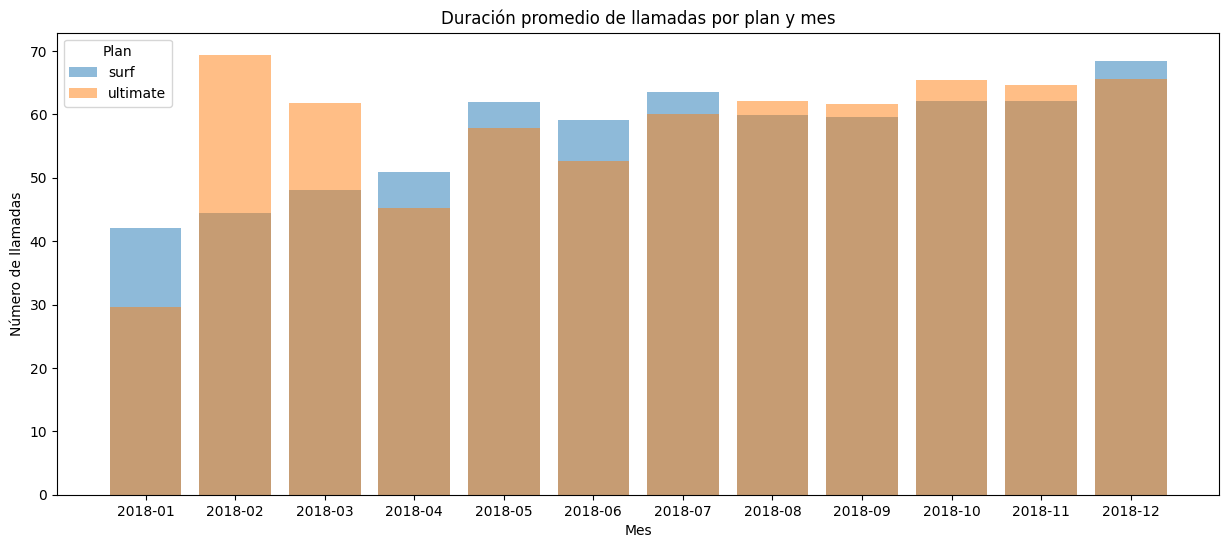

In [79]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
filtered_df = merged_df_1[merged_df_1["plan"].isin(["surf", "ultimate"])]

call_duration = filtered_df.groupby(["plan", "year_month"])["num_calls"].mean().reset_index()


fig, ax = plt.subplots(figsize=(15, 6))


for plan in ["surf", "ultimate"]:
    plan_data = call_duration[call_duration["plan"] == plan]
    ax.bar(plan_data["year_month"].astype(str), plan_data["num_calls"], alpha=0.5, label=plan)


ax.set_xlabel("Mes")
ax.set_ylabel("Número de llamadas")
ax.set_title("Duración promedio de llamadas por plan y mes")
ax.legend(title="Plan")

plt.show()

La grafica compara el promedio de minutos utilizados por mes del plan Surf y del plan Ultimate.

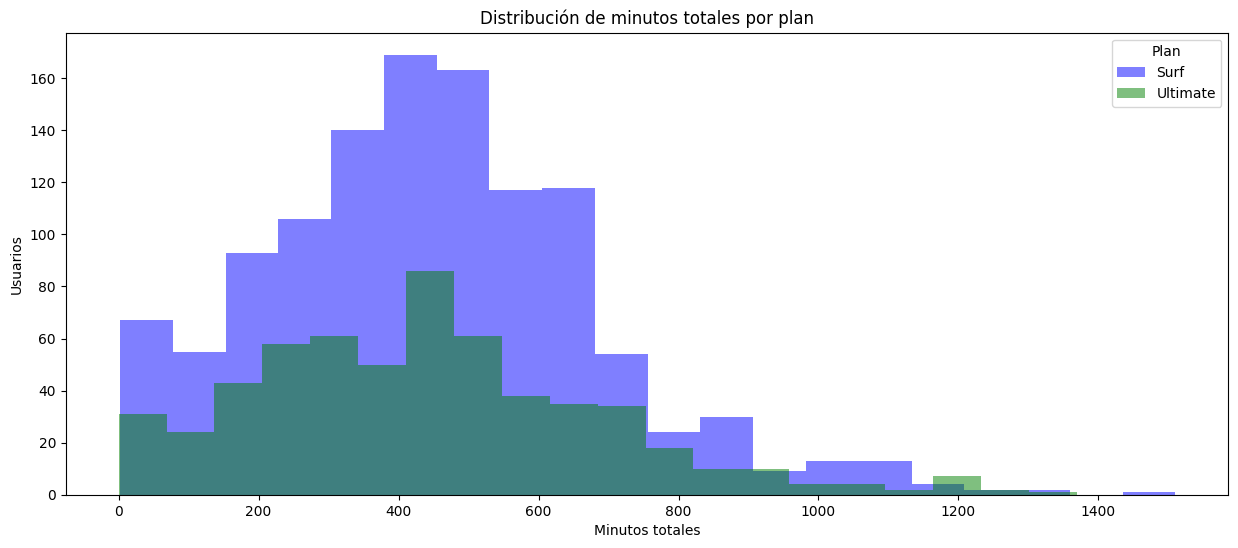

In [80]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

surf_data = merged_df_1[merged_df_1["plan"] == "surf"]
ultimate_data = merged_df_1[merged_df_1["plan"] == "ultimate"]

surf_min = surf_data.groupby(["user_id", "year_month"])["total_minutes"].sum().reset_index()
ultimate_min = ultimate_data.groupby(["user_id", "year_month"])["total_minutes"].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(surf_min["total_minutes"], bins=20, alpha=0.5, label="Surf", color="blue")
ax.hist(ultimate_min["total_minutes"], bins=20, alpha=0.5, label="Ultimate", color="green")

ax.set_xlabel("Minutos totales")
ax.set_ylabel("Usuarios")
ax.set_title("Distribución de minutos totales por plan")
ax.legend(title="Plan")

plt.show()

In [81]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_calls = merged_df_1["total_minutes"].mean()
var_calls = np.var(merged_df_1["total_minutes"])
print(f"Media: {mean_calls}")
print(f"Varianza: {var_calls}")

Media: 444.7015349630472
Varianza: 57550.18436944605


<AxesSubplot:xlabel='total_minutes'>

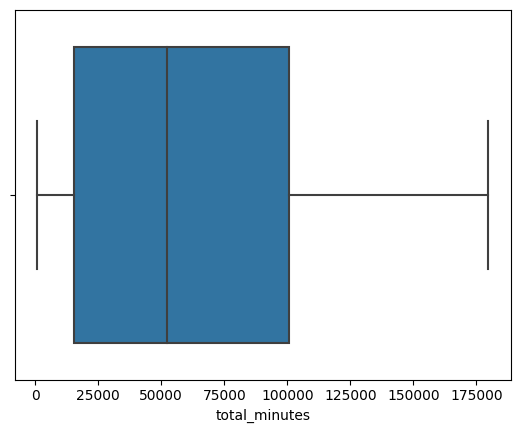

In [82]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
monthly_call_duration = merged_df_1.groupby("year_month")["total_minutes"].sum()
sns.boxplot(monthly_call_duration)

Los usuarios del plan Surf utilizan más sus minutos que los usuarios del plan Ultimate, el número de llamdas realizadas por los uriarios del plan Surf son muy similares que a los uasuarios del plan Ultimate excepto por tres meses (enero, febrero y marzo) ya que tiene una diferencia de llamadas entre ambos. En promedio se utilizan 445 minutos por usuario.  

### Mensajes

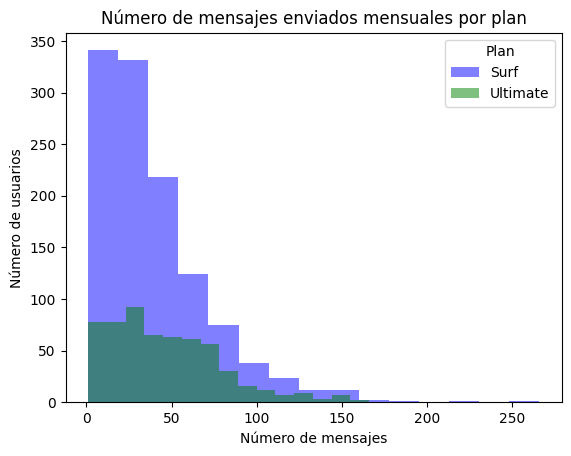

In [83]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_messages = surf_data.groupby(["user_id", "year_month"])["num_messages"].sum().reset_index()
ultimate_messages = ultimate_data.groupby(["user_id", "year_month"])["num_messages"].sum().reset_index()

fig, ax = plt.subplots()

ax.hist(surf_messages["num_messages"], bins=15, alpha=0.5, label="Surf", color="blue")
ax.hist(ultimate_messages["num_messages"], bins=15, alpha=0.5, label="Ultimate", color="green")

ax.set_xlabel("Número de mensajes")
ax.set_ylabel("Número de usuarios")
ax.set_title("Número de mensajes enviados mensuales por plan")
ax.legend(title="Plan")

plt.show()

In [84]:
mean_messages = merged_df_1["num_messages"].mean()
var_messages = np.var(merged_df_1["num_messages"])
print(f"Media: {mean_messages}")
print(f"Varianza: {var_messages}")

Media: 41.78283115406481
Varianza: 1066.9477211488647


<AxesSubplot:xlabel='num_messages'>

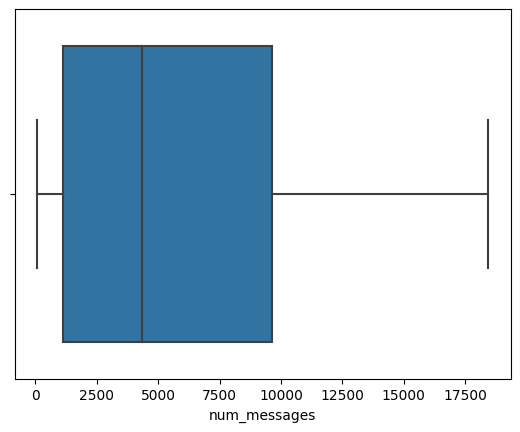

In [85]:
monthly_messages_duration = merged_df_1.groupby("year_month")["num_messages"].sum()
sns.boxplot(monthly_messages_duration)

Por lo que se puede obsevar en el frafico los usuarion que más utilizan SMS son los que han contratado el plan Surf, en comparacion a los que han optado por el plan Ultimate, en promedio se envian 42 SMS por usuario.

### Internet

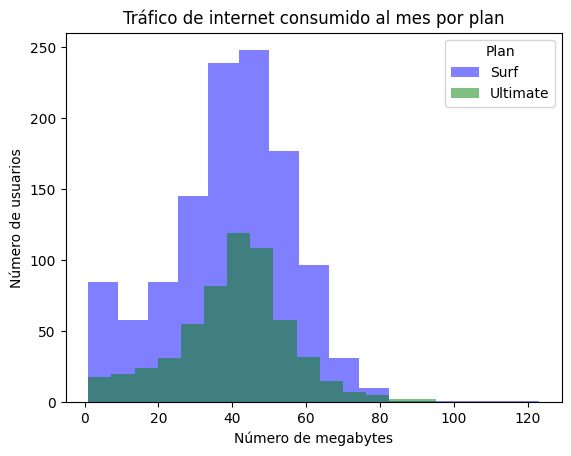

In [88]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_internet = surf_data.groupby(["user_id", "year_month"])["total_gb"].sum().reset_index()
ultimate_internet = ultimate_data.groupby(["user_id", "year_month"])["total_gb"].sum().reset_index()

fig, ax = plt.subplots()

ax.hist(surf_internet["total_gb"], bins=15, alpha=0.5, label="Surf", color="blue")
ax.hist(ultimate_internet["total_gb"], bins=15, alpha=0.5, label="Ultimate", color="green")

ax.set_xlabel("Número de megabytes")
ax.set_ylabel("Número de usuarios")
ax.set_title("Tráfico de internet consumido al mes por plan")
ax.legend(title="Plan")

plt.show()

In [90]:
mean_internet = merged_df_1["total_gb"].mean()
var_internet = np.var(merged_df_1["total_gb"])
print(f"Media: {mean_internet}")
print(f"Varianza: {var_internet}")

Media: 39.818646958499144
Varianza: 271.474217384742


<AxesSubplot:xlabel='total_gb'>

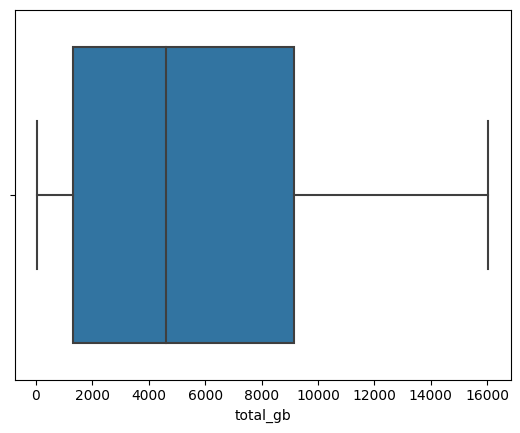

In [92]:
monthly_internet_duration = merged_df_1.groupby("year_month")["total_gb"].sum()
sns.boxplot(monthly_internet_duration)

Como podemos observar en la grafica los usuarios del pla Surf son los que han utilizado más gigabytes, en comparación con los usuarios que utilizan el plan Ultimate que utilizan menos gigabytes. se puede decir qu en promedio se utilizan 40 mb.

## Ingreso

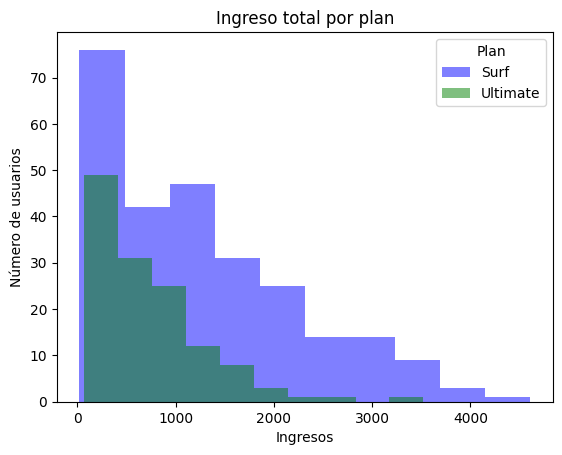

In [93]:
income_surf = surf_data.groupby("user_id")["total_income"].sum()
income_ultimate = ultimate_data.groupby("user_id")["total_income"].sum()

fig, ax = plt.subplots()

ax.hist(income_surf, alpha=0.5, label="Surf", color="blue")
ax.hist(income_ultimate, alpha=0.5, label="Ultimate", color="green")

ax.set_xlabel("Ingresos")
ax.set_ylabel("Número de usuarios")
ax.set_title("Ingreso total por plan")
ax.legend(title="Plan")

plt.show()

En esta grafica nos podemos percatar que los ingresos por el plan de prepago Surf son considerablemente mayores a los del plan de prepago Ultimate, para esta grafica se tomó en cuenta tanto el ingreso base que es la cantidad cobrada inicialmente por cada uno de los planes y los ingresos extras que cada uno obtuvo por os minutos, mensajes y megabytes utilizados por cada usuario.

## Prueba las hipótesis estadísticas

Hipótesis nula:  son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

Hipótesis alternatica: no son diferentes los ingresos promedio de los ususarios de los planes de llamada Ultimate y Surf.

In [95]:
total_income_calls_s = surf_data.groupby("user_id")["income_per_minute"].sum()
total_income_calls_u = ultimate_data.groupby("user_id")["income_per_minute"].sum()

In [96]:
# Prueba las hipótesis

alpha = 0.05

results = st.ttest_ind(total_income_calls_s, total_income_calls_u, equal_var= False) 

print('valor p: ', results.pvalue) 

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  7.056081099139169e-13
Rechazamos la hipótesis nula


Hipótesis nula: el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Hipótesis alternativa. el ingreso promedio de los usuarios de NY-NJ no es diferente al de los usuarios de otras regiones.

In [97]:
# Prueba las hipótesis
users_ny = merged_df_1[merged_df_1["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]  
other_users = merged_df_1[merged_df_1["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]
income_ny = users_ny.groupby("user_id")["total_income"].sum()
income_other = other_users.groupby("user_id")["total_income"].sum()
alpha = 0.05

results_1 = st.ttest_ind(income_ny, income_other, equal_var= False)

print('valor p: ', results_1.pvalue) 

if results_1.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.9263095306816816
No podemos rechazar la hipótesis nula


Tomando en cuenta que el proposito de realizar el analisis de datos para el operador de telecomunicaciones Megaline, que tiene como finalidad analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos, de acuerdo a lo observado en el analisis realizado se puede concluir que los usuarios del plan de prepago utilizan más tanto los minutos, mensajes y megabytes, esto en comparacion a los usuarios del plan Ultimate, lo que se traduce que aunque sea mayor el pago por cada plan Ultimate contratado, en comparación con el plan Surf que se adquiere por 20$ son los usuarios que más exceden el limite que obtienen por su plan lo que se traduce en mayores ingresos. 